In [2]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00


C:\Users\tori\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [17:29:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3390
[LightGBM] [Info] Number of data points in the train set: 2448, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

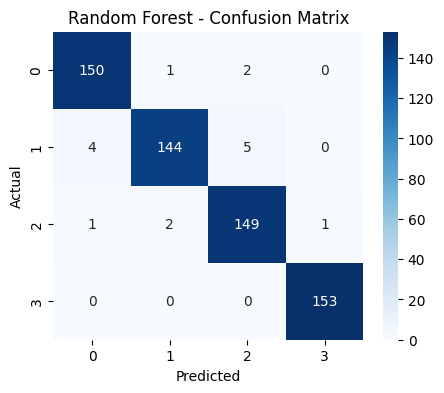


=== XGBoost ===
Accuracy: 0.9803921568627451
Classification Report:
              precision    recall  f1-score     support
0              0.961783  0.986928  0.974194  153.000000
1              0.986486  0.954248  0.970100  153.000000
2              0.980392  0.980392  0.980392  153.000000
3              0.993506  1.000000  0.996743  153.000000
accuracy       0.980392  0.980392  0.980392    0.980392
macro avg      0.980542  0.980392  0.980357  612.000000
weighted avg   0.980542  0.980392  0.980357  612.000000


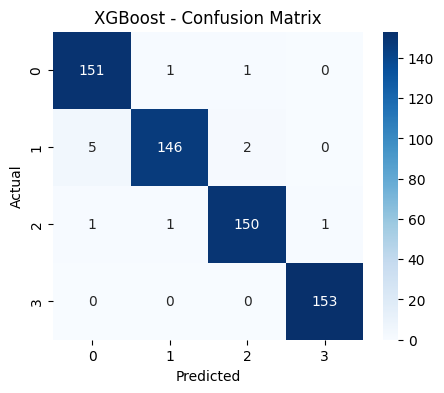


=== LightGBM ===
Accuracy: 0.9852941176470589
Classification Report:
              precision    recall  f1-score     support
0              0.968153  0.993464  0.980645  153.000000
1              0.993243  0.960784  0.976744  153.000000
2              0.986928  0.986928  0.986928  153.000000
3              0.993506  1.000000  0.996743  153.000000
accuracy       0.985294  0.985294  0.985294    0.985294
macro avg      0.985458  0.985294  0.985265  612.000000
weighted avg   0.985458  0.985294  0.985265  612.000000


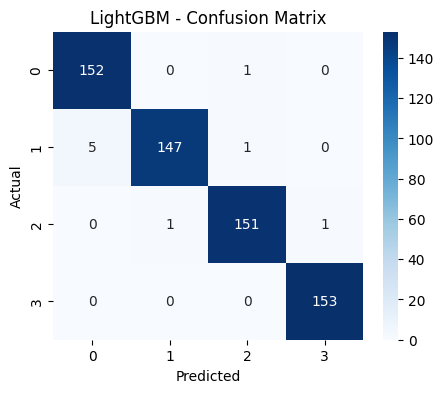

In [3]:
# 머신러닝 모델 성능 비교 - 타워램프 상태 분류
# 데이터: led_features_20250723_172434.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv('led_features_20250723_172434.csv')

# 2. 특성과 타깃 분리
X = df.drop(columns=['label', 'image_name', 'label_name'])
y = df['label']

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. 모델 정의
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# 5. 모델 학습 및 평가
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    results[name] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': report
    }

# 6. 결과 시각화
for name in models.keys():
    print(f"\n=== {name} ===")
    print("Accuracy:", results[name]['accuracy'])
    print("Classification Report:")
    print(pd.DataFrame(results[name]['classification_report']).T)

    plt.figure(figsize=(5,4))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
